In [1]:
####################################### Beginning  41-60 ###############################################

In [ ]:
####################################### 41 ###############################################

In [2]:
##### 41. Find the visit type with maximum 'No Show' #####

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [119]:
Patients_df= pd.read_excel("HospitalDatabase.xlsx", 'Patients' )
EDVisits_df = pd.read_excel("HospitalDatabase.xlsx", 'EDVisits' )
AmbulatoryVisits_df = pd.read_excel("HospitalDatabase.xlsx", 'AmbulatoryVisits' )
ReAdmissionRegistry_df = pd.read_excel("HospitalDatabase.xlsx", 'ReAdmissionRegistry')
Providers_df=pd.read_excel("HospitalDatabase.xlsx", 'Providers' )
Discharges_df = pd.read_excel("HospitalDatabase.xlsx",  'Discharges')
EDUnique_df = pd.read_excel("HospitalDatabase.xlsx", 'EDUnique' )


In [120]:
# Reading  HospitalDatabase file's sheet 'AmbulatoryVisits'  

df41AV = AmbulatoryVisits_df

In [121]:
# To check no. of unique values in column VisitType
df41AV["VisitType"].unique()

array(['Physical', 'Follow Up', 'Telemedicine', 'New'], dtype=object)

In [122]:
# To extract  column name 'VisitStatus' into a seperate dataframe
df41vs = df41AV.groupby("VisitStatus")

In [123]:
# To extract values from dataframe 'VisitStatus' based on condition with 'NoShow'
df41NS = df41vs.get_group("No Show")
df41NS

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
149,414,90,3,2019-02-25,2019-02-17 14:34:07.328,5,Follow Up,136.0,90.802316,79.426026,No Show
150,507,891,16,2019-01-25,2019-01-14 03:04:39.696,11,Telemedicine,155.0,112.064259,73.714965,No Show
151,410,90,22,2019-02-21,2019-01-31 11:29:47.000,1,Follow Up,131.0,80.726116,54.947675,No Show
152,803,888,15,2019-03-07,2019-02-25 11:54:27.274,8,Telemedicine,173.0,136.377032,58.024363,No Show


In [124]:
# To extract max count of the VisitType field from dataframe 'NoShow' 
df41=df41NS["VisitType"].unique().max()
df41

'Telemedicine'

In [125]:
#  ## ADITIONAL ANALYSIS : Verification : We can see Telemedicine is the highest

df41_verify = df41NS['VisitType'].value_counts()
df41_verify

Telemedicine    74
Follow Up       41
Physical        39
Name: VisitType, dtype: int64

In [126]:
####################################### 42 ####################################################

In [127]:
### 42. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery ####

In [128]:
df42P = Providers_df

In [129]:
df42P.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838


In [130]:
df42P[(df42P["ProviderID"] >=11) & (df42P["ProviderID"] <=20)]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862
16,17,Kent Kendall,Cardiology,2001-12-22 11:18:32.919
17,18,Ryan Kevin,Cardiology,2003-01-14 21:16:34.778
18,19,Tyler Conner,Cardiology,2003-07-09 02:41:40.410
19,20,Bailey Barret,Cardiology,2003-08-20 16:05:50.179


In [131]:
df42 = df42P.loc[(df42P.ProviderID >= 11) & (df42P.ProviderID <= 20) & (df42P.ProviderSpecialty =='Surgery')]
df42

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


In [132]:
####################################### 43 ###################################################

In [133]:
### 43. Write a regular expression to find all the digits and numbers in the string ###

In [134]:
import re

In [135]:
str = "NUM22/7-9JA-2022-DAML-25-26"
df43 = re.findall(r'[0-9]+', str)
print(df43)

['22', '7', '9', '2022', '25', '26']


In [136]:
####################################### 44 ###############################################

In [137]:
# 44. Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [138]:
import datetime

In [139]:
# Reading  HospitalDatabase file's sheet 'Discharges' 
df44DT = Discharges_df 
df44DT

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


In [140]:
df44DT['AdmissionDate'] = pd.to_datetime(df44DT['AdmissionDate'])
df44DT['DischargeDate'] = pd.to_datetime(df44DT['DischargeDate'])

In [141]:
df44DTa= df44DT
df44DTa['AdmissionDate'] = pd.to_datetime(df44DT['AdmissionDate']).dt.date
df44DTa['DischargeDate'] = pd.to_datetime(df44DT['DischargeDate']).dt.date
df44DTa

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892


In [142]:
df44DTa['LengthOS1'] = (df44DTa['DischargeDate']) - (df44DTa['AdmissionDate'])
LOS44 = df44DTa

In [143]:
df44DTa['LengthOS1'] 

0      6 days
1     12 days
2      4 days
3      8 days
4      8 days
        ...  
715   13 days
716    4 days
717    5 days
718   11 days
719   16 days
Name: LengthOS1, Length: 720, dtype: timedelta64[ns]

In [144]:
pivot44 = df44DTa.pivot_table(index = ['Service', 'PrimaryDiagnosis'], 
                       values = ['LengthOS1' ], aggfunc ='mean')

pivot44

LengthOS1
Service          PrimaryDiagnosis                             
Cardiology       AMI                          10 days 06:00:00
                 Afib                         11 days 04:48:00
                 Broken Leg                   10 days 16:00:00
                 Flu                          12 days 00:00:00
                 Heart Failure       9 days 12:18:27.692307692
                 Kidney Failure                4 days 00:00:00
General Medicine Broken Leg                   13 days 00:00:00
                 Diabetes           10 days 06:56:50.526315789
                 Fever                         8 days 00:00:00
                 Flu                           9 days 21:20:00
                 Hypertension        8 days 21:56:34.285714285
                 Kidney Failure               10 days 16:00:00
                 Laceration          9 days 10:17:08.571428571
                 Pneumonia           9 days 10:01:47.462686567
                 Stroke                       11 days 06:00:00
Hospitalist      AMI                          10 days 00:00:00
                 Broken Leg                    7 days 16:00:00
                 Diabetes            8 days 20:18:27.692307692
                 Fever                        10 days 16:00:00
                 Flu                 8 days 17:41:03.157894736
                 Hypertension                 10 days 16:00:00
                 Kidney Failure               10 days 04:00:00
                 Knee Replacement              6 days 00:00:00
                 Laceration                    9 days 00:00:00
                 Pneumonia           8 days 22:17:08.571428571
                 Stroke                       16 days 00:00:00
ICU              AMI                          12 days 04:48:00
                 Afib                          6 days 00:00:00
                 Fever                        13 days 08:00:00
                 Flu                           8 days 00:00:00
                 Heart Failure       9 days 10:54:32.727272727
                 Hypertension                  8 days 12:00:00
                 Kidney Failure               11 days 00:00:00
                 Laceration                   15 days 00:00:00
                 Pneumonia           8 days 07:10:07.792207792
                 Spinal Cord Injury           10 days 00:00:00
                 Stroke                       10 days 08:00:00
Neurology        AMI                           9 days 00:00:00
                 Flu                           7 days 00:00:00
                 Heart Failure                13 days 04:00:00
                 Hypertension                  9 days 00:00:00
                 Migraine                      8 days 14:00:00
                 Pain               10 days 06:51:25.714285714
                 Pneumonia                     9 days 19:12:00
                 Stroke              9 days 14:46:09.230769230
Orthopeadics     Hip Fracture        9 days 04:10:26.086956521
                 Knee Replacement              9 days 12:00:00

In [145]:
####################################### 45 ###############################################

In [146]:
# 45. Calculate mortality by diagnosis

In [147]:
df45RR = ReAdmissionRegistry_df 


In [148]:
pivot45 = df45RR.pivot_table(index = ['PrimaryDiagnosis'], 
                       values = ['ExpectedMortality' ], aggfunc ='mean')

pivot45

,ExpectedMortality
PrimaryDiagnosis,
AMI,0.235146
Afib,0.304235
Broken Leg,0.275440
Diabetes,0.286476
Fever,0.296601
Flu,0.272976
Heart Failure,0.385678
Hip Fracture,0.373310
Hypertension,0.296555


In [149]:
####################################### 46 ###############################################

In [150]:
# 46. Write a code to split a sentence into words using regex

In [151]:
Hack46 = "We are the team Budding Ninjas!"

In [152]:
# [A-Za-z]  = make it as list item if it is upper or lower case alphabet
#  |[^A-Za-z ]  = Ormake it as list item if it is NOT a alphabet

list46 = re.findall(r'[A-Za-z]+|[^A-Za-z ]', Hack46)

In [153]:
list46

['We', 'are', 'the', 'team', 'Budding', 'Ninjas', '!']

In [154]:
####################################### 47 ###############################################

In [155]:
# 47 Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic

In [156]:
df47AV = AmbulatoryVisits_df 

In [157]:
## Using loc

df47 = df47AV.loc[df47AV["BloodPressureSystolic"] == df47AV["BloodPressureSystolic"].max() ]
df47

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


In [158]:
## ADITIONAL ANALYSIS : using indexing
df47i = df47AV[df47AV["BloodPressureSystolic"] == df47AV["BloodPressureSystolic"].max() ]
df47i

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


In [159]:
## ADITIONAL ANALYSIS : using indexing
df47i = df47AV[df47AV["BloodPressureSystolic"] == df47AV["BloodPressureSystolic"].max() ]
df47i

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


In [160]:
####################################### 48 ###############################################

In [161]:
# 48. Display the average LOS based on Service and Discharge Disposition
# (Maintain the column Hierarchy)

In [162]:
df48D = Discharges_df 

In [163]:
df48D['AdmissionDate'] = pd.to_datetime(df48D['AdmissionDate'])
df48D['DischargeDate'] = pd.to_datetime(df48D['DischargeDate'])

In [164]:
df48D['AdmissionDate'] = pd.to_datetime(df48D['AdmissionDate']).dt.date
df48D['DischargeDate'] = pd.to_datetime(df48D['DischargeDate']).dt.date

df48D

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LengthOS1
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540,6 days
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163,8 days
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days
...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695,13 days
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930,4 days
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128,5 days
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892,11 days


In [165]:
LOS48 = (df48D['DischargeDate'] - df48D['AdmissionDate'])
LOS48.describe()

count                          720
mean               9 days 12:50:00
std      4 days 02:05:06.006769482
min                3 days 00:00:00
25%                6 days 00:00:00
50%                9 days 00:00:00
75%               13 days 00:00:00
max               16 days 00:00:00
dtype: object

In [166]:
df48D['LengthOS1'] = LOS48
df48D

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LengthOS1
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540,6 days
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163,8 days
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days
...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695,13 days
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930,4 days
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128,5 days
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892,11 days


In [167]:
df48D1= df48D
df48D1

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LengthOS1
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540,6 days
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163,8 days
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days
...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695,13 days
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930,4 days
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128,5 days
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892,11 days


In [168]:
DF48 = df48D1.pivot_table(index = ['Service', 'DischargeDisposition'], 
                       values = ['LengthOS1'], aggfunc ='mean')

DF48

LengthOS1
Service          DischargeDisposition                          
Cardiology       Expired                        8 days 20:48:00
                 Home                          10 days 04:28:48
                 Transfer                      11 days 04:48:00
General Medicine Expired                        8 days 12:00:00
                 Home                 9 days 18:33:00.786026200
                 Transfer                      10 days 16:30:00
Hospitalist      Expired                       10 days 00:00:00
                 Home                 9 days 00:49:05.454545454
                 Transfer                       8 days 16:00:00
ICU              Expired              9 days 06:37:14.482758620
                 Home                 9 days 03:03:16.363636363
                 Transfer                       8 days 20:00:00
Neurology        Expired                       10 days 04:26:40
                 Home                           9 days 04:40:00
                 Transfer                      12 days 00:00:00
Orthopeadics     Expired                       11 days 19:12:00
                 Home                 8 days 20:18:27.692307692
                 Transfer                      16 days 00:00:00

In [169]:
####################################### 49 ###############################################

In [170]:
# 49. Create a jointplot between expected mortality & expected length of stay

In [171]:
df49D = Discharges_df 

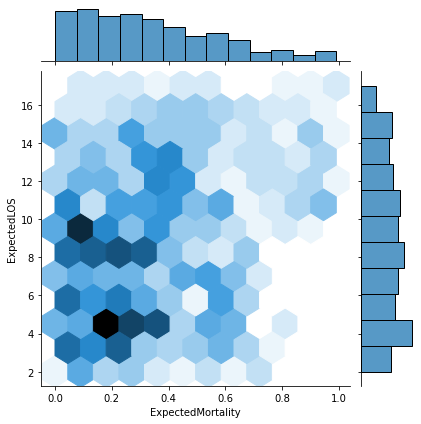

In [172]:
# draw jointplot with
# scatter kind
sns.jointplot(x = "ExpectedMortality", y = "ExpectedLOS",
              kind = "hex", data = df49D)

# show the plot
plt.show()

In [173]:
####################################### 50 ###############################################

In [174]:
# 50. Which departmentID has maximum number of visits scheduled

In [175]:
df50AV = AmbulatoryVisits_df

In [176]:
df50vs =df50AV.groupby("VisitDepartmentID")
df50vs

In [177]:
df50len= df50AV.groupby(["VisitDepartmentID"]).VisitID.agg([len])
df50len

,len
VisitDepartmentID,
1,51
2,51
3,51
4,51
5,92
6,92
7,93
8,93
9,79


In [178]:
df50len.loc[11]

len    102
Name: 11, dtype: int64

In [179]:
####################################### 51 ###############################################

In [180]:
# 51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [181]:
df51AV = EDUnique_df

In [182]:
df51 = df51AV[(df51AV["PatientID"])  & (df51AV["ReasonForVisit"] == 'Migraine') & (df51AV["Acuity"] >= 2)]
df51

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
22,55,3,2020-01-01 15:01:29.846,2020-01-01 23:11:53.864,3,Migraine,admitted
59,156,65,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted
67,192,101,2020-01-03 05:06:23.929,2020-01-03 16:27:48.524,2,Migraine,Admitted
69,194,103,2020-01-03 05:44:52.497,2020-01-03 12:58:53.397,3,Migraine,Admitted
123,314,223,2020-01-04 20:25:09.037,2020-01-05 11:22:10.005,3,Migraine,admitted
135,350,259,2020-01-05 07:01:24.933,2020-01-05 22:57:29.073,2,Migraine,Admitted
137,352,261,2020-01-05 07:46:44.909,2020-01-05 22:19:57.584,3,Migraine,Admitted
212,621,367,2020-01-08 15:57:39.576,2020-01-08 22:14:07.316,3,Migraine,admitted
222,655,401,2020-01-09 00:36:02.488,2020-01-09 05:07:45.675,2,Migraine,Admitted
224,657,403,2020-01-09 01:18:53.039,2020-01-09 06:06:48.009,3,Migraine,Admitted


In [183]:
####################################### 52 ###############################################

In [184]:
# 52. Retrieve the row with minimum DBP using sorting technique

In [185]:
df52AV = AmbulatoryVisits_df 

In [186]:
df52sort= df52AV.sort_values(by=['BloodPressureDiastolic'], na_position='last')
df52sort

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed
456,32,35,32,2019-02-01,2019-01-14 23:07:20.015,8,New,121.0,54.099878,80.480990,Completed
118,214,852,38,2019-03-31,2019-03-14 18:17:19.979,10,Physical,123.0,54.285242,93.909856,No Show
231,909,860,3,2019-04-21,2019-04-12 20:49:25.742,5,Telemedicine,122.0,56.594973,85.179520,Completed
545,372,557,3,2019-02-21,2019-02-13 13:05:43.263,11,Follow Up,125.0,57.043944,73.071398,Completed
...,...,...,...,...,...,...,...,...,...,...,...
805,666,818,33,2019-02-09,2019-02-01 02:22:14.761,10,Physical,NaN,NaN,NaN,Completed
807,555,72,35,2019-04-30,2019-04-02 08:38:32.357,7,Follow Up,NaN,NaN,NaN,Completed
808,645,90,37,2019-03-16,2019-02-16 17:45:16.908,1,Telemedicine,NaN,NaN,NaN,Completed
810,773,858,24,2019-03-12,2019-02-25 02:59:43.233,2,Follow Up,NaN,NaN,NaN,Completed


In [187]:
df52=df52sort.iloc[0]
df52

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 757, dtype: object

In [188]:
####################################### 53 ###############################################bbb

In [189]:
# 53. Take the ReasonForVisit from user, 
# find the number of patients admitted with that ReasonForVisit

In [190]:
df53E = EDUnique_df

In [191]:
df53a = df53E.groupby("ReasonForVisit")
df53a

In [192]:
df53 = df53a['ReasonForVisit'].value_counts()
df53

ReasonForVisit       ReasonForVisit     
Accident             Accident                37
Bleeding             Bleeding                25
Car Accident         Car Accident            16
Chest Pain           Chest Pain              91
Fever                Fever                  172
Gun Shot             Gun Shot                16
Intoxication         Intoxication            23
Laceration           Laceration              22
Migraine             Migraine               116
Pneumonia            Pneumonia              171
Shortness of Breath  Shortness of Breath    120
Stomach Ache         Stomach Ache           136
Name: ReasonForVisit, dtype: int64

In [193]:
####################################### 54 ###############################################

In [194]:
# 54. Mortality O.E

In [195]:
df54D=  Discharges_df 

In [196]:
df54a= df54D.groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
df54a

,PrimaryDiagnosis,PatientID
0,AMI,48
1,Afib,11
2,Broken Leg,9
3,Diabetes,64
4,Fever,19
5,Flu,80
6,Heart Failure,78
7,Hip Fracture,23
8,Hypertension,50
9,Kidney Failure,20


In [197]:
df54a.rename(columns={"PatientID":"Total_count"},inplace = True)

In [198]:
df54b = df54D[(df54D.DischargeDisposition=='Expired')].groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
df54b

,PrimaryDiagnosis,PatientID
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4
5,Flu,11
6,Heart Failure,16
7,Hip Fracture,3
8,Hypertension,16
9,Kidney Failure,2


In [199]:
df54b.rename(columns={"PatientID":"Observed_Death_count"},inplace = True)

In [200]:
df54c = pd.merge(df54a,df54b, on = "PrimaryDiagnosis", how = 'left')

In [201]:
df54c ['Observed_Death_count'].fillna(value=0, inplace=True)

In [202]:
# Expected Mortality df
df54em =df54D.groupby(['PrimaryDiagnosis'],as_index=False)['ExpectedMortality'].mean()
df54em

,PrimaryDiagnosis,ExpectedMortality
0,AMI,0.235146
1,Afib,0.304235
2,Broken Leg,0.275440
3,Diabetes,0.286476
4,Fever,0.296601
5,Flu,0.272976
6,Heart Failure,0.385678
7,Hip Fracture,0.373310
8,Hypertension,0.296555
9,Kidney Failure,0.247592


In [203]:
#Merging to get Death count df
df54 = pd.merge(df54c ,df54em, on = "PrimaryDiagnosis", how = 'left')
df54

,PrimaryDiagnosis,Total_count,Observed_Death_count,ExpectedMortality
0,AMI,48,6.0,0.235146
1,Afib,11,4.0,0.304235
2,Broken Leg,9,3.0,0.275440
3,Diabetes,64,9.0,0.286476
4,Fever,19,4.0,0.296601
5,Flu,80,11.0,0.272976
6,Heart Failure,78,16.0,0.385678
7,Hip Fracture,23,3.0,0.373310
8,Hypertension,50,16.0,0.296555
9,Kidney Failure,20,2.0,0.247592


In [204]:
df54['Exp_Death_count']=df54['ExpectedMortality']*df54['Total_count']

In [205]:
df54['Morality_O:E']=df54['Observed_Death_count']/df54['Exp_Death_count']

In [206]:
df54

,PrimaryDiagnosis,Total_count,Observed_Death_count,ExpectedMortality,Exp_Death_count,Morality_O:E
0,AMI,48,6.0,0.235146,11.287028,0.531584
1,Afib,11,4.0,0.304235,3.346590,1.195246
2,Broken Leg,9,3.0,0.275440,2.478958,1.210186
3,Diabetes,64,9.0,0.286476,18.334439,0.490879
4,Fever,19,4.0,0.296601,5.635418,0.709796
5,Flu,80,11.0,0.272976,21.838083,0.503707
6,Heart Failure,78,16.0,0.385678,30.082879,0.531864
7,Hip Fracture,23,3.0,0.373310,8.586140,0.349400
8,Hypertension,50,16.0,0.296555,14.827774,1.079056
9,Kidney Failure,20,2.0,0.247592,4.951837,0.403891


In [207]:
####################################### 55 ###############################################

In [208]:
# 55. Create a bar chart on service & expected length of stay

In [209]:
df55D = Discharges_df 

<BarContainer object of 720 artists>

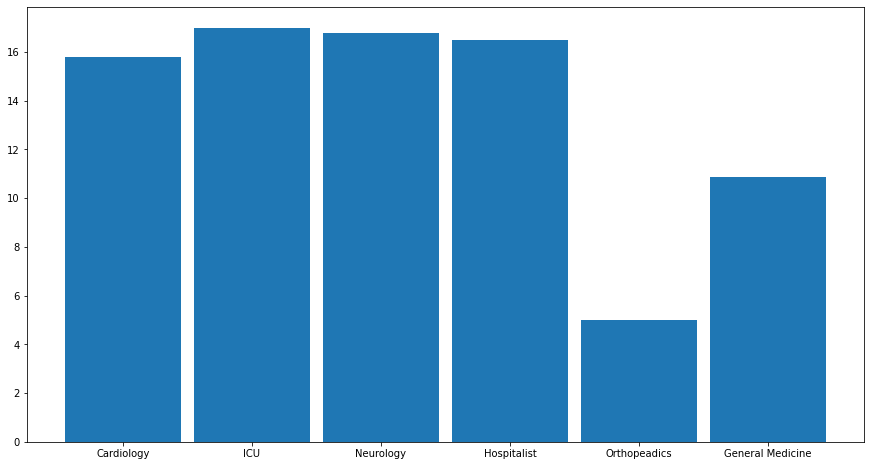

In [210]:
plt.figure(figsize = (15,8))
plt.bar(df55D['Service'], height = df55D['ExpectedLOS'], width = 0.9)

In [211]:
####################################### 56 ###############################################

In [212]:
# 56. Count of canceled status

In [213]:
df56AV = AmbulatoryVisits_df 

In [216]:
df56 = len(df56AV[df56AV['VisitStatus'] == 'Canceled'])
df56

60

In [217]:
####################################### 57 ###############################################

In [218]:
# 57. Find the age prone to get stroke

In [219]:
df57P=Patients_df

In [220]:
df57D =Discharges_df 

In [221]:
df57P['Date'] = pd.to_datetime(df57P.DateOfBirth)
df57P['Date']

0     1960-01-01 00:00:00.000
1     1985-11-15 02:08:42.090
2     1976-04-15 02:52:09.762
3     1968-10-15 03:32:13.635
4     1962-05-01 19:12:58.950
                ...          
940   1986-05-26 00:01:19.761
941   1970-06-10 21:41:03.814
942   1983-01-08 21:49:27.884
943   1963-06-05 07:57:05.569
944   1972-08-06 03:40:03.454
Name: Date, Length: 945, dtype: datetime64[ns]

In [222]:
import datetime 
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [223]:
df57P['Date'].apply(lambda x: from_dob_to_age(x))

0      62
1      36
2      46
3      53
4      60
       ..
940    35
941    51
942    39
943    58
944    49
Name: Date, Length: 945, dtype: int64

In [224]:
df57a = df57P['Date'].apply(lambda x: from_dob_to_age(x))

In [225]:
df57P1=Patients_df

In [226]:
# adding age column to patients dataset.
df57P1['age']=df57a
df57P1

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01 00:00:00.000,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15 02:08:42.090,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15 02:52:09.762,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15 03:32:13.635,53
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01 19:12:58.950,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986-05-26 00:01:19.761,35
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970-06-10 21:41:03.814,51
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983-01-08 21:49:27.884,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963-06-05 07:57:05.569,58


In [227]:
df57b=df57D[df57D['PrimaryDiagnosis']=='Stroke']
df57b

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LengthOS1
25,402,184,2018-01-14,2018-01-29,Expired,ICU,Stroke,13.910330,0.755644,15 days
32,267,203,2018-01-16,2018-01-23,Expired,Neurology,Stroke,14.274502,0.541246,7 days
38,327,288,2018-01-23,2018-02-08,Expired,Neurology,Stroke,9.115077,0.693990,16 days
44,27,335,2018-01-27,2018-02-11,Expired,Neurology,Stroke,10.516934,0.957984,15 days
58,177,409,2018-02-01,2018-02-08,Expired,Neurology,Stroke,11.360759,0.784439,7 days
...,...,...,...,...,...,...,...,...,...,...
689,22,277,2018-01-22,2018-02-06,Transfer,General Medicine,Stroke,10.206560,0.182587,15 days
690,23,280,2018-01-23,2018-01-29,Transfer,ICU,Stroke,14.499949,0.316988,6 days
691,24,291,2018-01-24,2018-01-30,Transfer,ICU,Stroke,11.178354,0.367017,6 days
692,25,303,2018-01-25,2018-01-30,Transfer,ICU,Stroke,12.294841,0.418960,5 days


In [228]:
df57=pd.merge(df57b, df57P1, on = "PatientID", how = "inner")

<AxesSubplot:ylabel='Frequency'>

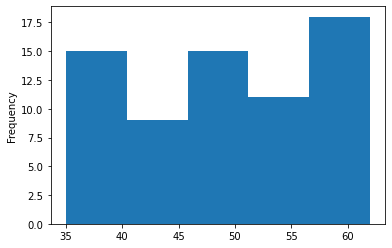

In [229]:
#histogram
df57['age'].plot(kind='hist',bins=5)

In [230]:
## Hence the people whose age is above 55 are prone to stroke.

In [231]:
####################################### 58 ###############################################

In [232]:
# 58. Display total count of patients service wise based on gender

In [233]:
df58D = Discharges_df

In [234]:
df58P = Patients_df

In [235]:
# Merging Discarges data with Patient's data to get gender

In [236]:
discarges_df_gender=pd.merge(df58D,df58P, on = "PatientID", how = 'inner')

In [237]:
df58 = discarges_df_gender.groupby(['Service','Gender'],as_index=False)['PatientID'].count()

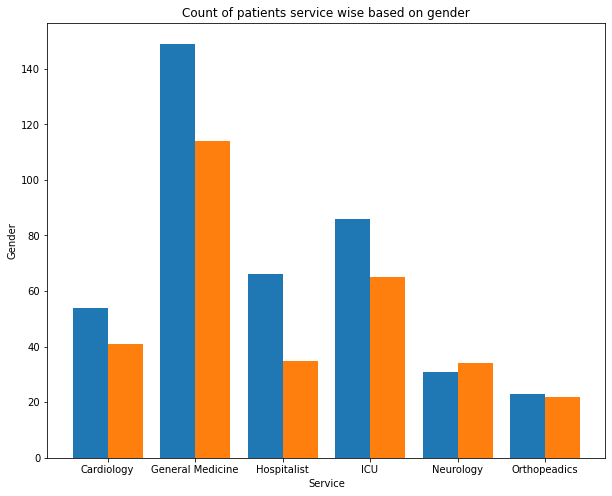

In [238]:
x=df58.Service.unique().tolist()
Male = df58.PatientID[df58.Gender=='Male'].tolist()
Female = df58.PatientID[df58.Gender=='Female'].tolist()
w=0.4
plt.figure(figsize = (10,8))
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,Male,w,label="Male")
plt.bar(bar2,Female,w,label="Female")
plt.xlabel('Service')
plt.ylabel('Gender')
plt.title('Count of patients service wise based on gender')
plt.xticks(bar1+w/2,x)
plt.show()

In [239]:
####################################### 59 ###############################################

In [240]:
# 59. Create a dataframe by splitting provider name to 
# firstname and lastname with names for the columns

In [241]:
df59P = Providers_df

In [242]:
df59P.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838


In [243]:
#New data frame with split value columns
df59P[['ProviderFirstName','ProviderLastName']] = df59P["ProviderName"].str.split(" ", expand=True)
df59P


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,ProviderFirstName,ProviderLastName
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,Harry,Kane
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,Barry,Bar
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,Ted,Green
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,Ted,Black
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,Fred,Man


In [244]:
####################################### 60 ###############################################

In [245]:
# # 60. "Predict the output of the program..
# class Acc: 
# def __init__(self, id): 
# self.id = id
# id = 555 

# acc = Acc(111) 
# print(acc.id)
# "

In [246]:
# Prediction: Since we are passing value 111 while creating obj of class Acc, 
## it has more priority. so 111 will display

class Acc: 
    def __init__(self, id): 
        self.id = id
        id = 555 

acc = Acc(111) 
print(acc.id)
 

111


In [247]:
####################################### End of 41-60 ####################################################